Missing Data  
·       Bargraph of Missing Data by Target Variable  
·       Line graph of missing data by date  
·       Map of missing data by state  

Other data exploration  
·       Scatter matrix of continuous variables  

PCA  
·       Barchart of variables explaining greatest principle compontents (decreasing order) for first 3(?) components 
·       Histograms and by-state maps of select components that drive variance  

Evaluation  
·       For select counties, chart predicted mobility against observed mobility


In [51]:
import build_master_df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# df = build_master_df.build_df()
df = pd.read_csv('full_df.csv')
df.head(5)

,date,fips,StateName,CountyName,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,TMIN_7d_avg,TMIN_10d_avg,TMAX_3d_avg,TMAX_5d_avg,TMAX_7d_avg,TMAX_10d_avg,int_date_public schools,int_date_restaurant dine-in,int_date_federal guidelines,int_date_foreign travel ban
0,2020-02-15,1001,ALABAMA,AUTAUGA COUNTY,5.0,7.0,NaN,NaN,-4.0,NaN,...,31.769104,31.769104,40.247782,40.247782,40.247782,40.247782,0,0,0,0
1,2020-02-15,1003,ALABAMA,BALDWIN COUNTY,17.0,12.0,55.0,8.0,6.0,-2.0,...,33.111111,33.111111,41.472222,41.472222,41.472222,41.472222,0,0,0,0
2,2020-02-15,1005,ALABAMA,BARBOUR COUNTY,5.0,-2.0,NaN,NaN,-5.0,NaN,...,32.000000,32.000000,40.805556,40.805556,40.805556,40.805556,0,0,0,0
3,2020-02-15,1007,ALABAMA,BIBB COUNTY,14.0,10.0,NaN,NaN,3.0,NaN,...,30.777778,30.777778,41.888889,41.888889,41.888889,41.888889,0,0,0,0
4,2020-02-15,1009,ALABAMA,BLOUNT COUNTY,7.0,1.0,NaN,NaN,8.0,NaN,...,28.888889,28.888889,39.111111,39.111111,39.111111,39.111111,0,0,0,0


Text(0.5,1,'Bargraph of Missing Data by Target Variable')

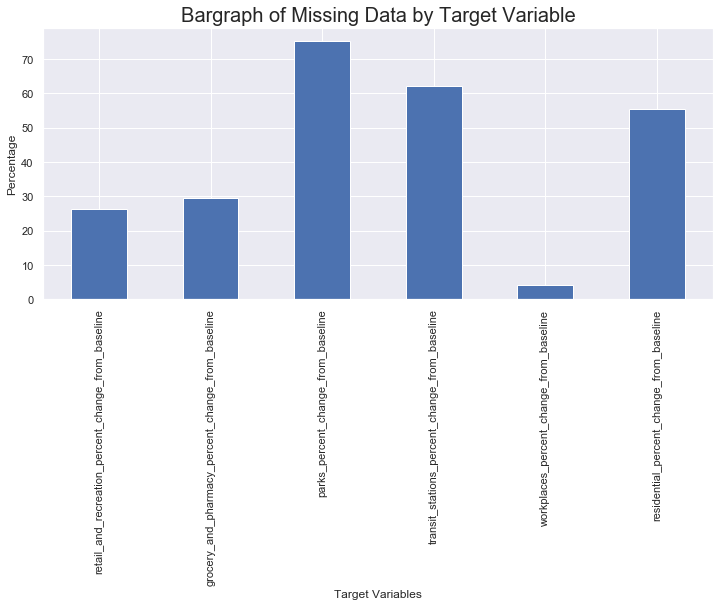

In [56]:
sns.set(rc={'figure.figsize':(12, 5)})
Missing_by_Target = df[[c for c in df.columns if c.endswith('baseline')]].isnull().sum() / df.shape[0] * 100
Missing_by_Target.plot(kind='bar')
plt.xlabel("Target Variables")
plt.ylabel("Percentage")
plt.title('Bargraph of Missing Data by Target Variable', fontsize=20)

Text(0.5,1,'Missing Data by Date by Target Variables')

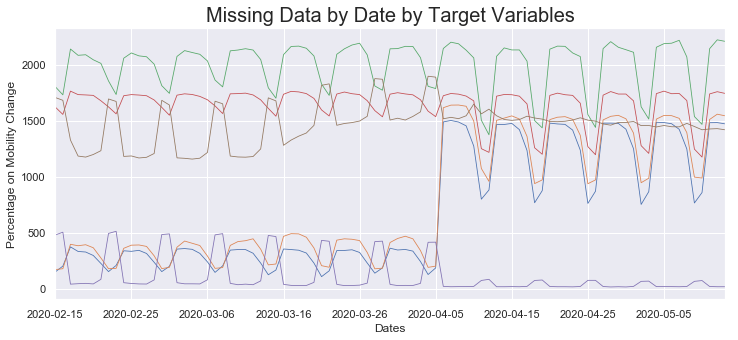

In [57]:
df1 = df[df['retail_and_recreation_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df1.plot(linewidth=0.8)
df2 = df[df['grocery_and_pharmacy_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df2.plot(linewidth=0.8)
df3 = df[df['parks_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df3.plot(linewidth=0.8)
df4 = df[df['transit_stations_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df4.plot(linewidth=0.8)
df5 = df[df['workplaces_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df5.plot(linewidth=0.8)
df6 = df[df['residential_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()
df6.plot(linewidth=0.8)
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Missing Data by Date by Target Variables', fontsize=20)

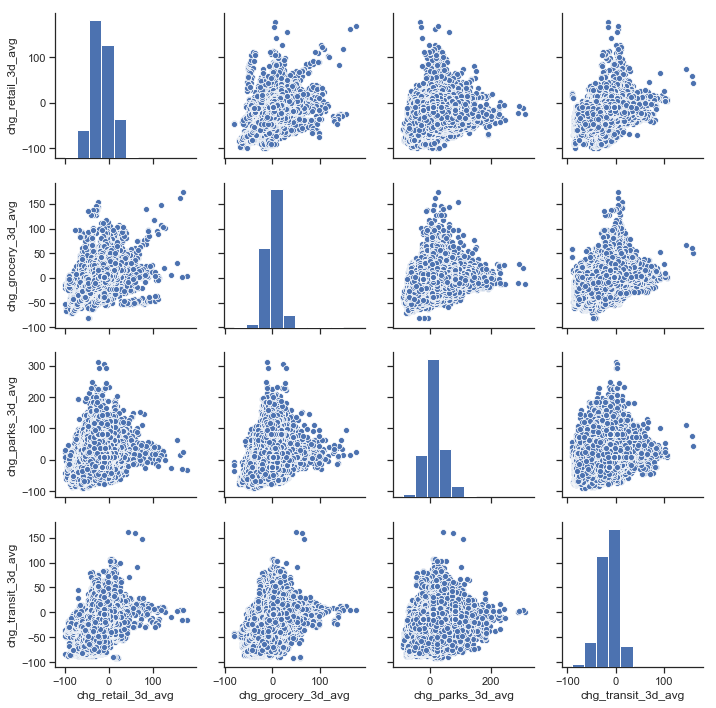

In [50]:
df_retail = df[['chg_retail_3d_avg', 'chg_grocery_3d_avg', 'chg_parks_3d_avg', 'chg_transit_3d_avg']]
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_retail, vars=df_retail.columns)